In [1]:
import MDAnalysis as mda
import MDAnalysis.analysis.rms
import matplotlib.pyplot as plt
import pandas as pd
from MDAnalysis.analysis import rms


In [2]:

# Create a new Universe but only consider frames from start_frame onwards
u = mda.Universe('../testing/run.gro', '../trajs/centered_trajectory_dcd.xtc')

In [3]:
start_frame = 1  # replace with your desired start frame


In [4]:
R = rms.RMSD(u,  # universe to align
             u,  # reference universe or atomgroup
             select='name CA and resid 1-162',  # group to superimpose and calculate RMSD
             groupselections=['name CA and resid 1-162'],  # groups for RMSD
             ref_frame=2)  # frame index of the reference


In [5]:
R

In [6]:
R.run(start=start_frame, stop=None)

In [7]:
df = pd.DataFrame(R.rmsd,
                  columns=['Frame', 'Frame (ns)',
                           'Backbone', 'protein'])

/home/jaybraun/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rms.py:710: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


In [8]:
df

,Frame,Frame (ns),Backbone,protein
0,1.0,100.0,1.440418e+00,1.440418
1,2.0,200.0,4.806067e-07,0.000000
2,3.0,300.0,1.144465e+00,1.144465
3,4.0,400.0,1.988522e+00,1.988522
4,5.0,500.0,1.378254e+00,1.378254
...,...,...,...,...
921,922.0,92200.0,2.779732e+00,2.779731
922,923.0,92300.0,2.732355e+00,2.732356
923,924.0,92400.0,3.079269e+00,3.079269
924,925.0,92500.0,2.951470e+00,2.951470


In [9]:
import numpy as np

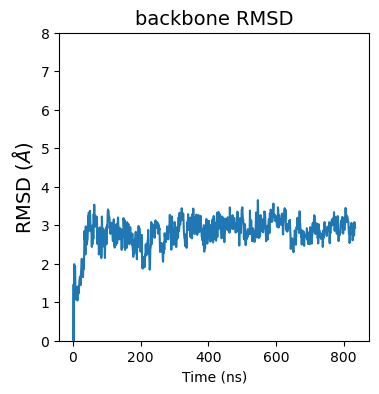

In [12]:
fig, ax = plt.subplots(figsize=(4, 4))

# ax.plot(df['Frame'], df['Backbone'], label='Backbone', color='red', linestyle='-', linewidth=4)

time_per_frame_ns = 9e3 / 1000  # replace with actual time per frame

# Create a new column 'Time (µs)' in the DataFrame
df['Time (µs)'] = df['Frame (ns)'] * time_per_frame_ns / 1000

# Now plot with the correct time
ax.plot(df['Time (µs)'], df['Backbone'])
ax.set_xlabel('Time (ns)')

# ax.set_xlabel('ns', fontsize=14)
ax.set_ylabel(r'RMSD ($\AA$)', fontsize=14)
ax.set_title('backbone RMSD', fontsize=14)
ax.set_ylim([0, 8])  # set y-limit

# ax.legend(fontsize=12)


# Original data goes from 0 to 2 µs
# original_ticks = np.linspace(1, 2, num=5)

# # You want to relabel this to go from 2.5 to 4.5 µs
# new_tick_labels = np.linspace(2.5, 4.5, num=5)

# ax.set_xticks(original_ticks)
# ax.set_xticklabels(new_tick_labels)

plt.savefig('../figs/rmsd_dcd.png',dpi = 400)
plt.show()

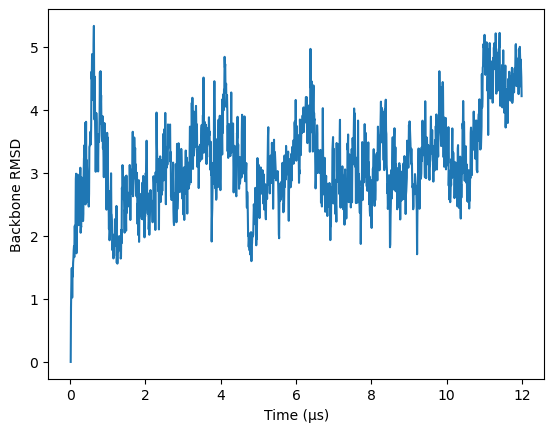

In [62]:
# Define your time per frame (in ns)
# You should replace this with the actual time per frame in your simulation
time_per_frame_ns = 8e3 / 1000  # replace with actual time per frame

# Create a new column 'Time (µs)' in the DataFrame
df['Time (µs)'] = df['Frame (ns)'] * time_per_frame_ns / 1000

# Now plot with the correct time
plt.plot(df['Time (µs)'], df['Backbone'])
plt.xlabel('Time (µs)')
plt.ylabel('Backbone RMSD')
plt.show()

In [96]:
u.trajectory[-1] 

< Timestep 926 with unit cell dimensions [ 96.64447  96.64447 248.43683  90.       90.       90.     ] >

In [30]:
import MDAnalysis as mda
# from MDAnalysisData import datasets
from MDAnalysis.analysis import rms, align
import nglview as nv


/home/jaybraun/miniconda3/lib/python3.9/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [31]:
average = align.AverageStructure(u, u, select='protein and name CA',
                                 ref_frame=1000).run()
ref = average.universe

/home/jaybraun/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/align.py:950: DeprecationWarning: The `universe` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.universe` instead.
  warnings.warn(wmsg, DeprecationWarning)


In [36]:
c_alphas = u.select_atoms('backbone')
R = rms.RMSF(c_alphas).run()

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


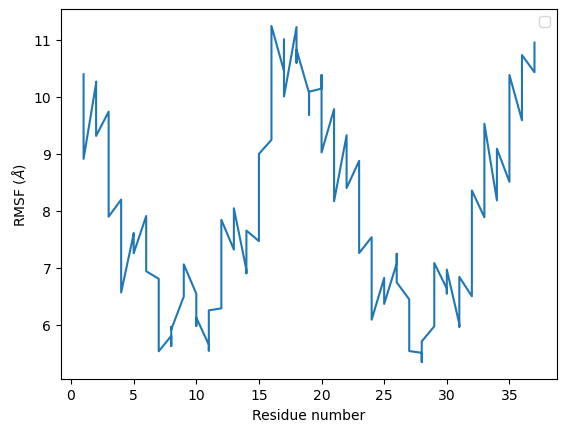

In [39]:
plt.plot(c_alphas.resids, R.rmsf)
plt.xlabel('Residue number')
plt.ylabel('RMSF ($\AA$)')

plt.legend();

In [2]:
import MDAnalysis as mda

In [1]:
from MDAnalysis.analysis import align

/home/jaybraun/miniconda3/lib/python3.9/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [68]:
import nglview as nv

In [51]:
import MDAnalysis as mda
from MDAnalysis.coordinates import XTC

# Load the Universe with the topology and trajectory files
u = mda.Universe('../testing/6.6_2.gro', '../trajs/9._skip10.xtc')

# Select the protein
protein = u.select_atoms('protein')

# Define the center of the box in x and y
center = u.dimensions[:2] / 2.0

with XTC.XTCWriter('../trajs/centered_trajectory_mlx_5.xtc', u.atoms.n_atoms) as W:
    for ts in u.trajectory:
        # Calculate the center of mass of the protein in the x-y plane
        com = protein.center_of_mass()[:2]
        # Calculate the translation vector, leaving z unchanged
        translation_vector = center - com
        translation_vector = [*translation_vector, 0.0]

        # Translate the protein so its center of mass is at the center of the box in the x-y plane
        protein.translate(translation_vector)
        
        # Write the entire Universe (including all molecules) to the trajectory
        W.write(u.atoms)

In [66]:
from MDAnalysis.analysis import align

/home/jaybraun/miniconda3/lib/python3.9/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [31]:
# Load your universes
universes = [mda.Universe('../trajs/mlx1.gro','../trajs/mlx1.xtc'),
             mda.Universe('../trajs/mlx1.gro','../trajs/mlx2.xtc'),
             mda.Universe('../trajs/mlx1.gro','../trajs/mlx3.xtc'),
             mda.Universe('../trajs/mlx1.gro','../trajs/mlx4.xtc'),
             mda.Universe('../trajs/mlx1.gro','../trajs/mlx5.xtc')]

# Set each universe to the last frame
for universe in universes:
    universe.trajectory[-1]  # last frame

# Align all universes to the first one
for universe in universes[1:]:
    align.alignto(universe, universes[0], select='name CA', match_atoms=True)

# Merge all universes for visualization
merged = mda.Merge(*[universe.atoms for universe in universes])

# Display in nglview
view = nv.show_mdanalysis(merged)

In [80]:
# Load your universes THIS is for bsc2
universes = [mda.Universe('../bsc2_trajs/test.gro','../bsc2_trajs/test.xtc'),
             mda.Universe('../bsc2_trajs/tg/test.gro','../bsc2_trajs/tg/test.xtc')]

# Set each universe to the last frame
for universe in universes:
    universe.trajectory[-1]  # last frame

# Align all universes to the first one
for universe in universes[1:]:
    align.alignto(universe, universes[0], select='name CA', match_atoms=True)

# Merge all universes for visualization
merged = mda.Merge(*[universe.atoms for universe in universes])

# Display in nglview
view = nv.show_mdanalysis(merged)

In [81]:
view

NGLWidget()

In [78]:
view

NGLWidget(n_components=1)

In [73]:
# Write the output to a GRO file
with mda.Writer('../trajs/output2.gro', merged.atoms) as writer:
    writer.write(merged)

In [83]:
# Render the view
view.render_image()

# Download the screenshot
view.download_image('../bsc2_figs/screenshot.png')